In [106]:
pip install -r requirements.txt

     |████████████████████████████████| 102kB 2.0MB/s ta 0:00:011
  Stored in directory: /Users/yuanwenliang/Library/Caches/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib
Note: you may need to restart the kernel to use updated packages.


## How to come from bands to images

highly suggested to watch the vedio:
https://www.neonscience.org/neon-hsi-aop-functions-python

A satellite image is created by combining measurements of the intensity of certain wavelengths of light, both visible and invisible to human eyes.

source: https://earthobservatory.nasa.gov/features/FalseColor

Most of the electromagnetic radiation that matters for Earth-observing satellites comes from the Sun. When sunlight reaches Earth, the energy is absorbed, transmitted, or reflected. (Absorbed energy is later re-emitted as lower-energy radiation.) Every surface or object absorbs, emits, and reflects light uniquely depending on its chemical makeup. Chlorophyll in plants, for example, absorbs red and blue light, but reflects green and infrared; this is why leaves appear green. This unique absorption and reflection pattern is called a spectral signature.

To make a satellite image, we choose three bands and represent each in tones of red, green, or blue. Because most visible colors can be created by combining red, green, and blue light, we then combine the red, green, and blue-scale images to get a full-color representation of the world.

Data visualizers and remote sensing scientists make true- or false-color images in order to show the features they are most interested in, and they select the wavelength bands most likely to highlight those features.



In [16]:
## Prerequisite functions

import rasterio as rio
from rasterio import plot
import numpy as np
from PIL import Image, ImageDraw
import glob
import os
import matplotlib.pyplot as plt
from matplotlib import colors



# The initial release contains only one tile, so lets hardcode its location
# here.  When you have more tiles, you can update this
TILE_X = 7680
TILE_Y = 10240

# The expected value of a Pixel in a mask file indicating that the pixel is
# within that region.  Tuple value, (Red, Green, Blue, Alpha)
IS_IN_MASK_PIXEL_VALUE = (0, 0, 0, 255)

# Tile width / height in pixels

TILE_WIDTH_PX = 512
TILE_HEIGHT_PX = 512

def get_cropped_image_paths(tile_x, tile_y, band, date):
    path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/cropped/cropped-{tile_x}-{tile_y}-{band}-{date}.png"
    #path = glob.glob(path)
    #path = path[0] # get the first date 
    return path 

def get_timeseries_image_paths(tile_x, tile_y, band, date):
    path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/timeseries/{tile_x}-{tile_y}-{band}-{date}.png"
    #path = glob.glob(path)
    #path = path[0] # get the first date 
    return path 

def band_repre(tile_x, tile_y, date,img='bands'):
    get_blue = get_band(tile_x, tile_y, date, band='B02')
    b2 = get_blue['b']; blue = get_blue['read']
    get_green = get_band(tile_x, tile_y, date, band='B03')
    b3 = get_green['b']; green = get_green['read']
    get_red = get_band(tile_x, tile_y, date, band='B04')
    b4 = get_red['b']; red = get_red['read']
    get_nir = get_band(tile_x, tile_y, date, band='B08')
    b8 = get_nir['b']; nir = get_nir['read']
    #multiple band representation
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4))
    plot.show(b2, ax=ax1, cmap='Blues')
    plot.show(b3, ax=ax2, cmap='Greens')
    plot.show(b4, ax=ax3, cmap='RdGy')
    plot.show(b8, ax=ax4, cmap='Blues')
    fig.tight_layout()

def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

def get_band(tile_x, tile_y, date, band, cropped = False):
    if cropped == True:
        path = get_cropped_image_paths(tile_x, tile_y, band, date)
    else:
        path = get_timeseries_image_paths(tile_x, tile_y, band, date)
    
    b = rio.open(path)
    read = normalize(b.read(1))
    
    get_band = dict()
    get_band['read'] = read; get_band['b'] = b

    return get_band


   

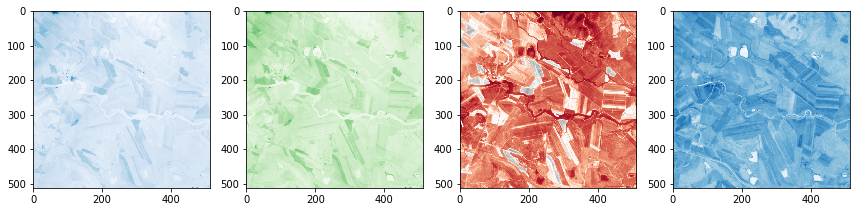

In [31]:

band_repre(TILE_X, TILE_Y,'2016-12-22')


**A natural or “true-color”** image combines actual measurements of red, green, and blue light. The result looks like the world as humans see it. 

mode 1: Using red, green, blue, the visible light image shows dark green forest, light green agriculture, brown wetlands, silver urban areas (the city of Miami), and turquoise offshore reefs and shallows. These colors are similar to what you would see from an airplane.


mode 2~4: The second mode shows the same scene in green, near infrared, and shortwave infrared light. In this false-color band combination, plant-covered land is bright green, water is black, and bare earth ranges from tan to pink. Urban areas are purple. Newly burned farmland is dark red, while older burns are lighter red. Much of the farmland in this area is used to grow sugar cane. Farmers burn the crop before harvest to remove leaves from the canes. Because burned land looks different in this kind of false-color image, it is possible to see how extensively farmers rely on fire in this region.

In [53]:
def TCI(tile_x, tile_y, date,img='TCI', mode = 1):
    get_blue = get_band(tile_x, tile_y, date, band='B02')
    b2 = get_blue['b']; blue = get_blue['read']
    
    get_green = get_band(tile_x, tile_y, date, band='B03')
    b3 = get_green['b']; green = get_green['read']
    
    get_red = get_band(tile_x, tile_y, date, band='B04')
    b4 = get_red['b']; red = get_red['read']
    
    get_nir = get_band(tile_x, tile_y, date, band='B08')
    b8 = get_nir['b']; nir = get_nir['read']
    
    get_swir_c = get_band(tile_x, tile_y, date, band='B10')
    b10 = get_swir_c['b']; swir_c = get_swir_c['read']
    
    get_swir_1 = get_band(tile_x, tile_y, date, band='B11')
    b11 = get_swir_1['b']; swir_1 = get_swir_1['read']
    
    get_swir_2 = get_band(tile_x, tile_y, date, band='B12')
    b12 = get_swir_2['b']; swir_2 = get_swir_2['read']
    
    # Stack bands
    if mode == 1: tci = np.dstack((red, green, blue))
    elif mode == 2: tci = np.dstack((swir_c, nir, green))
    elif mode == 3: tci = np.dstack((swir_1, nir, green))
    elif mode == 4: tci = np.dstack((swir_2, nir, green))

    # View the color composite
    plt.imshow(tci)
    plt.savefig(f'./Output/tci-{tile_x}-{tile_y}-{date}.png')    
    
    return tci
       
    
def tci_hist(tile_x, tile_y, date):
    #generate histogram
    trueColor = rio.open(f'./Output/tci-{tile_x}-{tile_y}-{date}.png', count=3)
    plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, 
                   alpha=0.3, histtype='stepfilled', title="Histogram")

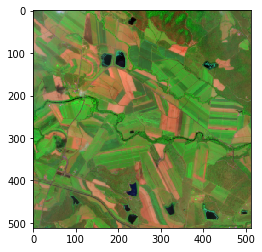

In [58]:

tci = TCI(TILE_X, TILE_Y,'2016-12-22',mode=4)

**A false-color** image uses at least one non-visible wavelength, though that band is still represented in red, green, or blue. As a result, the colors in the final image may not be what you expect them to be. (For instance, grass isn’t always green.) Such false-color band combinations reveal unique aspects of the land or sky that might not be visible otherwise.


mode1: This false colour composite scheme allows vegetation to be detected readily in the image. In this type of false colour composite images, vegetation appears in different shades of red depending on the types and conditions of the vegetation, since it has a high reflectance in the NIR band (as shown in the graph of spectral reflectance signature). Plants are dark red because they reflect infrared light strongly, and the infrared band is assigned to be red. Plants that are growing quickly reflect more infrared, so they are brighter red. That means that this type of false-color image can help us see how well plants are growing and how densely vegetated an area is. 

Clear water appears dark-bluish (higher green band reflectance), while turbid water appears cyan (higher red reflectance due to sediments) compared to clear water. Bare soils, roads and buildings may appear in various shades of blue, yellow or grey, depending on their composition.

mode2~4: In this display scheme, vegetation appears in shades of green. Bare soils and clearcut areas appear purplish or magenta.


source: https://crisp.nus.edu.sg/~research/tutorial/opt_int.htm

In [15]:
def FCI(tile_x, tile_y, date, mode=1):
    get_blue = get_band(tile_x, tile_y, date, band='B02')
    b2 = get_blue['b']; blue = get_blue['read']
    
    get_green = get_band(tile_x, tile_y, date, band='B03')
    b3 = get_green['b']; green = get_green['read']
    
    get_red = get_band(tile_x, tile_y, date, band='B04')
    b4 = get_red['b']; red = get_red['read']
    
    get_nir = get_band(tile_x, tile_y, date, band='B08')
    b8 = get_nir['b']; nir = get_nir['read']
    
    get_swir_c = get_band(tile_x, tile_y, date, band='B10')
    b10 = get_swir_c['b']; swir_c = get_swir_c['read']
    
    get_swir_1 = get_band(tile_x, tile_y, date, band='B11')
    b11 = get_swir_1['b']; swir_1 = get_swir_1['read']
    
    get_swir_2 = get_band(tile_x, tile_y, date, band='B12')
    b12 = get_swir_2['b']; swir_2 = get_swir_2['read']
    
    # Stack bands
    if mode == 1: fci = np.dstack((nir, red, green))
    elif mode == 2: fci = np.dstack((swir_c, nir, red))
    elif mode == 3: fci = np.dstack((swir_1, nir, red))
    elif mode == 4: fci = np.dstack((swir_2, nir, red))

    # View the color composite
    plt.imshow(fci)
    plt.savefig(f'./Output/fci-mode{mode}-{tile_x}-{tile_y}-{date}.png')    
    
    return fci
    
 

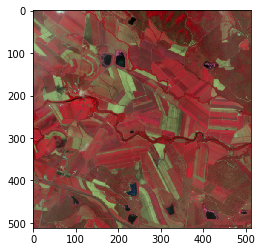

In [14]:
fci = FCI(TILE_X, TILE_Y,'2016-12-22',mode=1)
#get_band(TILE_X, TILE_Y,'2016-12-22', band='B02', img = 'FCI')['read'][1]

In [21]:
full = Image.open(get_timeseries_image_paths(
    TILE_X, TILE_Y,date = '2016-12-22', band = 'TCI'))
tci = Image.open(f'./Output/tci-{TILE_X}-{TILE_Y}-2016-12-22.png')
fci = Image.open(f'./Output/fci-mode1-{TILE_X}-{TILE_Y}-2016-12-22.png')
full.show()
tci.show()
fci.show()

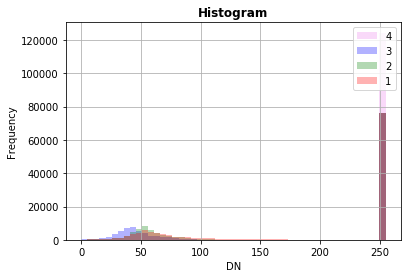

In [115]:
tci_hist(TILE_X, TILE_Y,'2016-12-22')